In [1]:
from Assemblies.game import GameField
import numpy as np

from fractions import Fraction

import matplotlib.pyplot as plt
from matplotlib import animation

np.set_printoptions(precision=3)

In [2]:
# init
L = 30
fraction_D = 0.1
b = 1.8

rndm = np.random.RandomState(123)
instance = (rndm.uniform(size=(L, L)) < fraction_D).astype(int)
game = GameField(L, b)
game.field = instance

In [22]:
def draw_field(field, point_size=10, scale=10):
    plt.figure(figsize = (scale*1, scale*0.666))
    point_size = scale / (len(field)**2) * 10000
    
    y, x = (1-field).nonzero()
    c = ['b']*len(x)
    plt.scatter(x + y*np.sin(np.pi/6), y * np.sin(np.pi/3), s=point_size, marker='h')
    y, x = field.nonzero()
    plt.scatter(x + y*np.sin(np.pi/6), y * np.sin(np.pi/3), s=point_size, marker='h', c='r')
    plt.show()

<IPython.core.display.Javascript object>


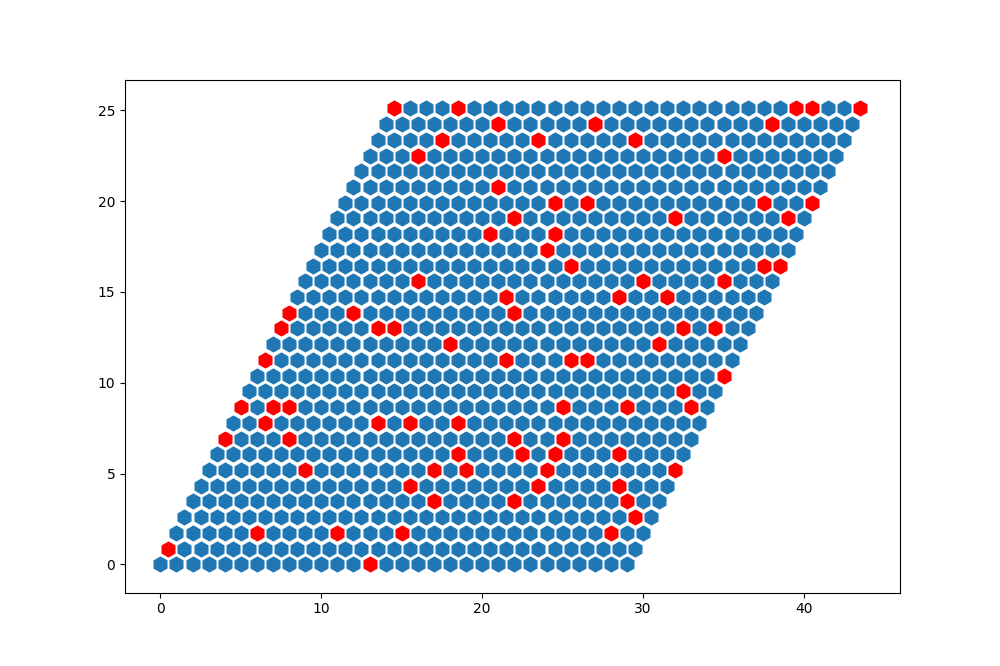

In [23]:
draw_field(game.field)

In [114]:
def draw_field2(field, point_size=10, scale=10):
    plt.figure(figsize = (scale*1, scale*0.666))
    point_size = scale / (len(field)**2) * 10000
    
    y1, x1 = (1-field).nonzero()    
    y2, x2 = field.nonzero()
    
    y = np.hstack((y1, y2))
    x = np.hstack((x1, x2))
    c = ['C0']*len(x1) + ['r']*len(x2)
    #c = [0.1]*len(x1) + [0.9]*len(x2)
    
    plt.scatter(x + y*np.sin(np.pi/6), y * np.sin(np.pi/3), s=point_size, marker='h', c=c)
    plt.show()
    
#draw_field2(game.field)

In [51]:
# init
L = 30
fraction_D = 0.1
b = 1.1

rndm = np.random.RandomState(12345)
instance = (rndm.uniform(size=(L, L)) < fraction_D).astype(int)
game = GameField(L, b)
game.field = instance

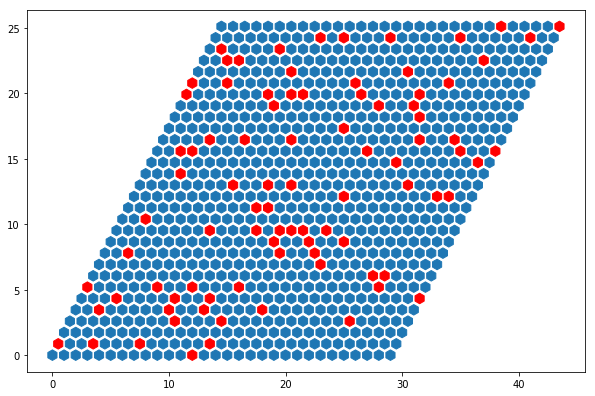

In [52]:
draw_field2(game.field)

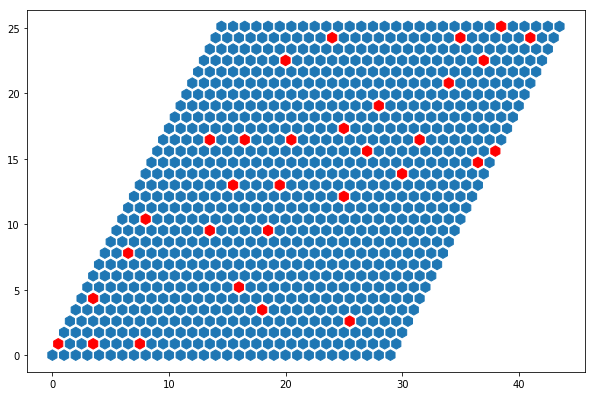

In [53]:
game.evolveT(1000)
draw_field2(game.field)

MovieWriter ffmpeg unavailable. Trying to use imagemagick_file instead.


RuntimeError: Error creating movie, return code: 1

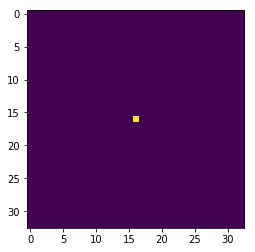

In [36]:
L = 33
field = np.zeros((L, L), dtype=int)
field[int(L/2), int(L/2)] = 1

# draw the initial field
fig = plt.figure()
im = plt.imshow(field, animated=True)

# updater function
def updatefig(*args):
    global field
    field = evolve2(field, 2.34, 1)
    im.set_array(field)
    return im,

# animate!
anim = animation.FuncAnimation(fig, updatefig, frames=200, interval=50)

anim.save('field.mp4', fps=1)

plt.show()

In [25]:
game.field

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

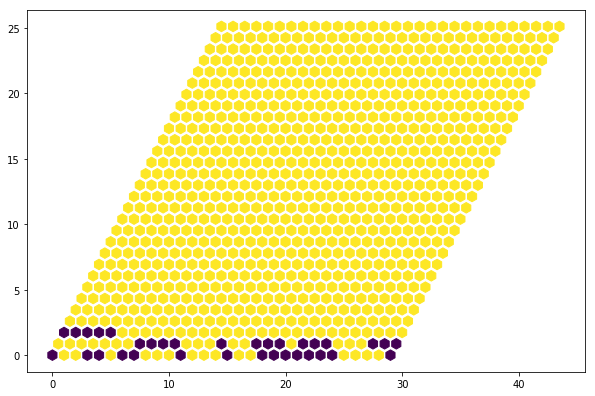

In [11]:
scale = 10


rndm = np.random.RandomState(123)
instance = (rndm.uniform(size=(L, L)) < fraction_D).astype(int)
game = GameField(L, b)
game.field = instance


# initial draw
fig = plt.figure(figsize = (scale*1, scale*0.666))

point_size = scale / (len(game.field)**2) * 10000

y1, x1 = (1 - game.field).nonzero()    
y2, x2 = game.field.nonzero()

y = np.hstack((y1, y2))
x = np.hstack((x1, x2))
c = [0.1]*len(x1) + [0.9]*len(x2)

scat = plt.scatter(x + y*np.sin(np.pi/6), y * np.sin(np.pi/3), s=point_size, marker='h', c=c)

#plt.show()


# updater
def updatefig(*args):
    global game
    game.evolveT(1)
    
    y1, x1 = (1 - game.field).nonzero()    
    y2, x2 = game.field.nonzero()
    
    y = np.hstack((y1, y2))
    x = np.hstack((x1, x2))
    c = [0.1]*len(x1) + [0.9]*len(x2)   #['C0']*len(x1) + ['r']*len(x2)
    scat.set_array(np.asarray(c))
    return scat,

# animate!
anim = animation.FuncAnimation(fig, updatefig, frames=200, interval=50)


plt.show()

In [12]:
# init
L = 30
fraction_D = 0.1
b = 1.8

rndm = np.random.RandomState(123)
instance = (rndm.uniform(size=(L, L)) < fraction_D).astype(int)
game = GameField(L, b)
game.field = instance

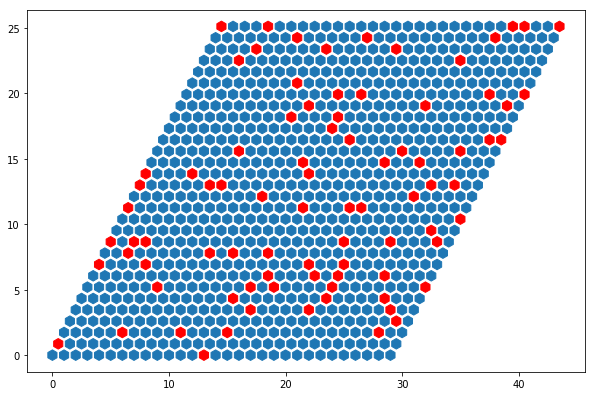

In [18]:
draw_field2(game.field)

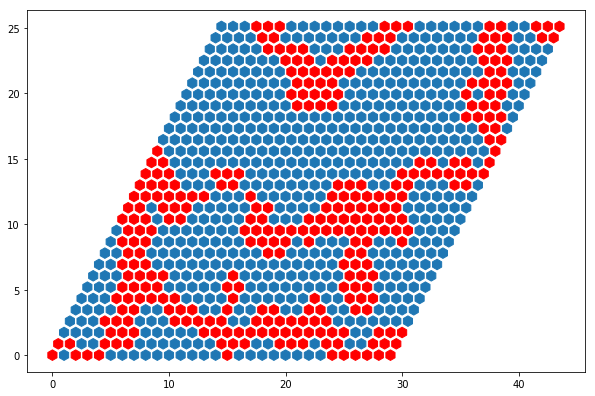

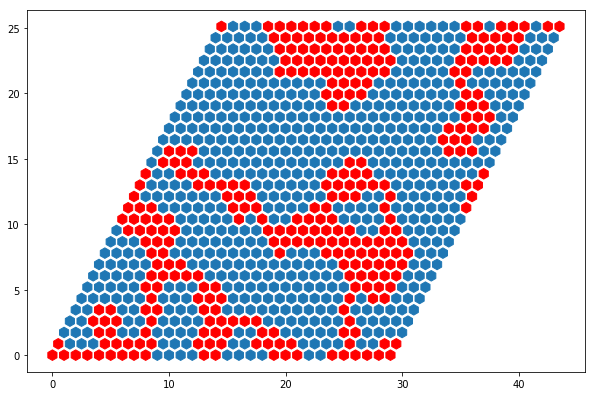

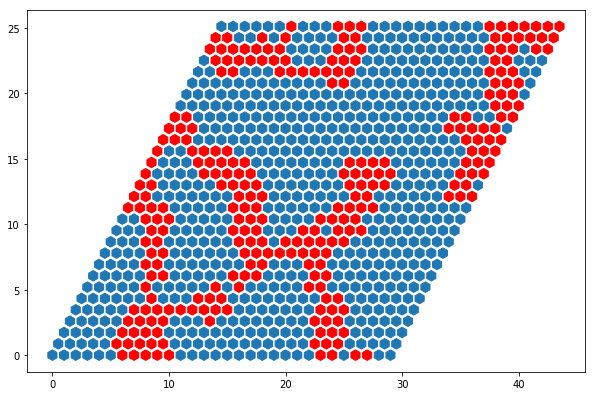

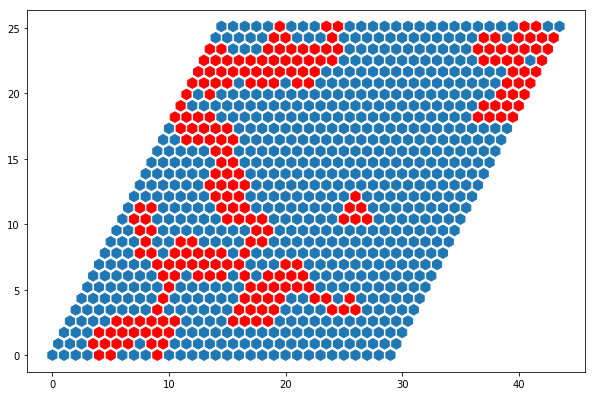

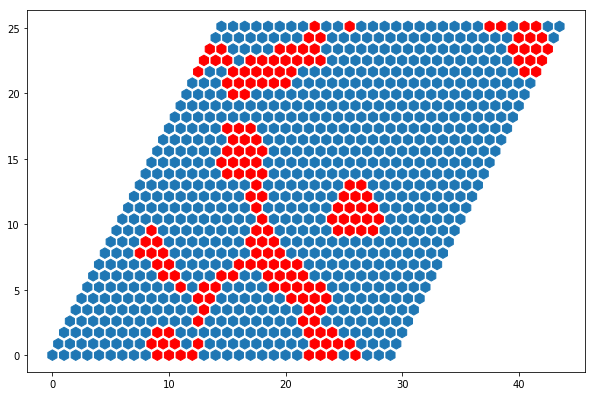

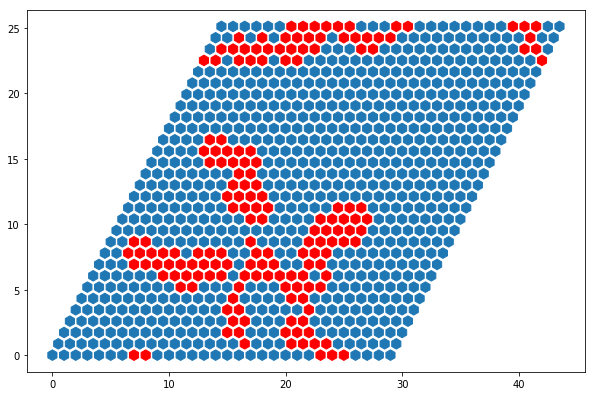

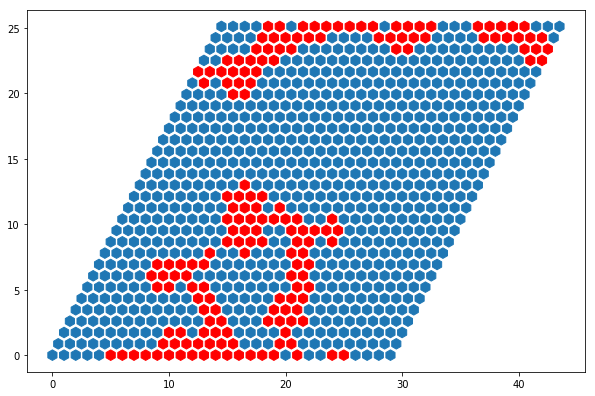

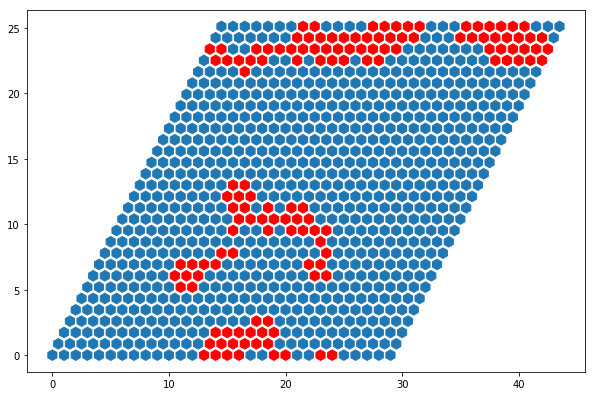

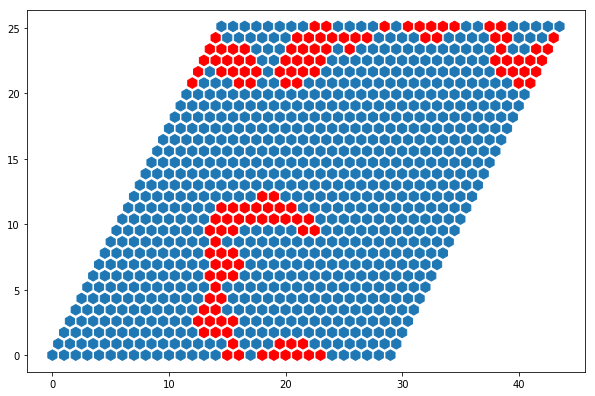

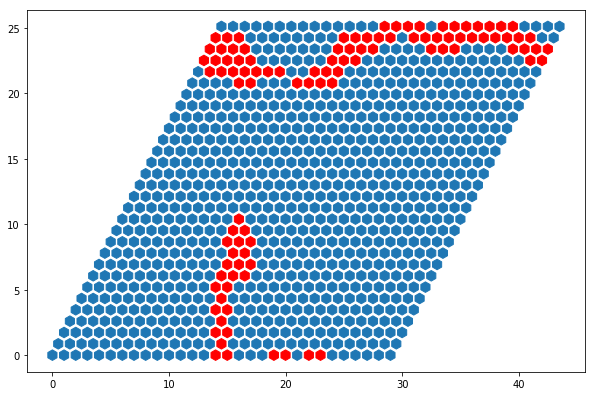

In [20]:
for step in range(10):
    game.evolveT(100)
    draw_field2(game.field)

In [105]:
# init
L = 9
fraction_D = 0.1
b = 7/4 + 1e-3

rndm = np.random.RandomState(123)
game = GameField(L, b)
#game.field = (rndm.uniform(size=(L, L)) < fraction_D).astype(int)
game.field = np.zeros((L, L), dtype=int)
game.field[4, 4] = 1

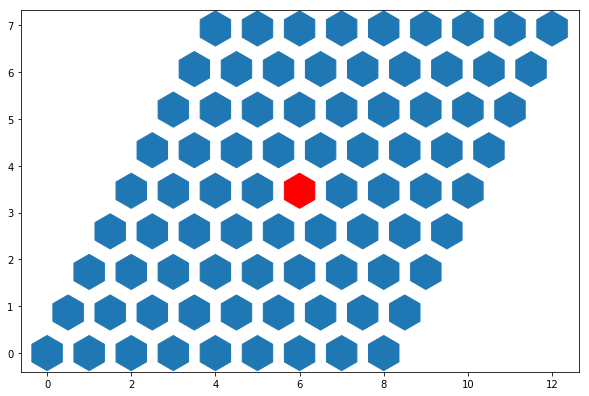

In [106]:
draw_field2(game.field)

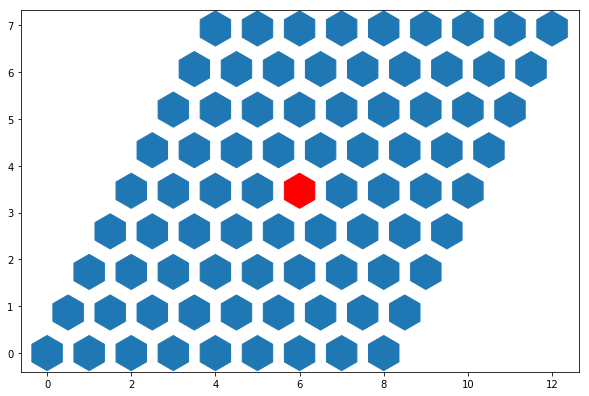

In [110]:
game.evolveT(1)
draw_field2(game.field)

In [111]:
rndm = np.random.RandomState(123)
game = GameField(L, b)
game.field = (rndm.uniform(size=(L, L)) < fraction_D).astype(int)
#game.field = np.zeros((L, L), dtype=int)
#game.field[4, 4] = 1

In [112]:
n_therm = 1000
game.evolveT(n_therm)

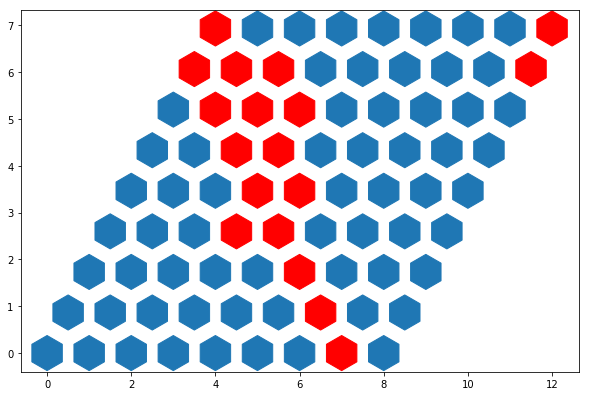

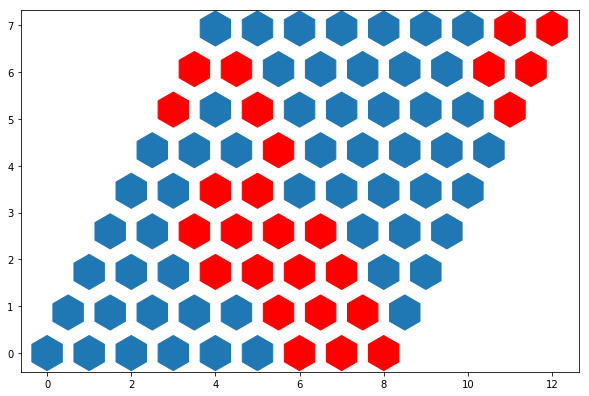

In [118]:

draw_field2(game.field)
game.evolveT(1)
draw_field2(game.field)

In [119]:
def draw_field3(ax, point_size=10, scale=10):
    #plt.figure(figsize = (scale*1, scale*0.666))
    point_size = scale / (len(field)**2) * 10000
    
    y1, x1 = (1-field).nonzero()    
    y2, x2 = field.nonzero()
    
    y = np.hstack((y1, y2))
    x = np.hstack((x1, x2))
    c = ['C0']*len(x1) + ['r']*len(x2)
    #c = [0.1]*len(x1) + [0.9]*len(x2)
    #plt.show()
    
    ax.scatter(x + y*np.sin(np.pi/6), y * np.sin(np.pi/3), s=point_size, marker='h', c=c)
    
#draw_field2(game.field)

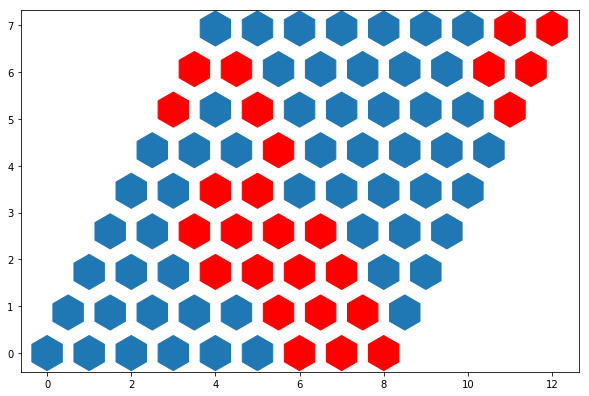

In [126]:
fig = plt.figure(figsize = (10*1, 10*0.666))
ax = fig.add_subplot(111)

field = game.field

point_size = 10 / (len(field)**2) * 10000

y1, x1 = (1-field).nonzero()    
y2, x2 = field.nonzero()

y = np.hstack((y1, y2))
x = np.hstack((x1, x2))
c = ['C0']*len(x1) + ['r']*len(x2)
#c = [0.1]*len(x1) + [0.9]*len(x2)
#plt.show()

scat = ax.scatter(x + y*np.sin(np.pi/6), y * np.sin(np.pi/3), s=point_size, marker='h', c=c, animated=True)



In [129]:
scat.set_array

<bound method ScalarMappable.set_array of <matplotlib.collections.PathCollection object at 0x7f0631dbf630>>

In [140]:
def draw_field4(game, ax=None, point_size=10, scale=10):
    if ax is None:
        fig = plt.figure(figsize = (scale*1, scale*0.666))
        ax = fig.add_subplot(111)
    point_size = scale / (len(field)**2) * 10000
    
    y1, x1 = (1 - game.field).nonzero()    
    y2, x2 = game.field.nonzero()
    
    y = np.hstack((y1, y2))
    x = np.hstack((x1, x2))
    c = ['C0']*len(x1) + ['r']*len(x2)
    #c = [0.1]*len(x1) + [0.9]*len(x2)
    #plt.show()
    
    ax.scatter(x + y*np.sin(np.pi/6), y * np.sin(np.pi/3), s=point_size, marker='h', c=c)

    return ax
#draw_field2(game.field)

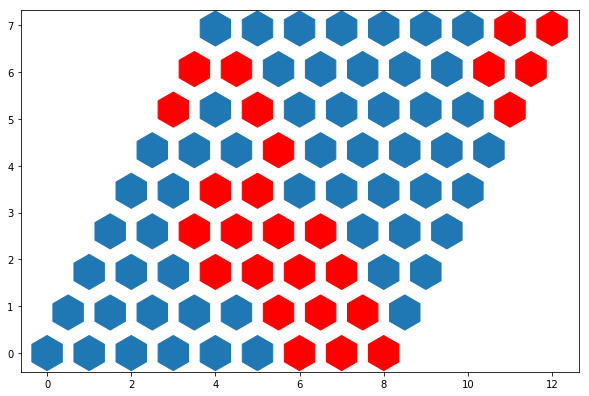

In [147]:
draw_field4(game=game)

In [194]:
############### this should really go to br_utils
def lighten_axes(ax):
    #remove the spines
    for pos in ["right", "left", "top", "bottom"]:
        ax.spines[pos].set_visible(False)

    #tick marks as well
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

    return ax

In [233]:
def draw_field5(game, ax=None, point_size=10, scale=10):
    """Two steps: blue is C, red is D, yellow is C->D, and green is D->C"""
    if ax is None:
        fig = plt.figure(figsize = (scale*1, scale*0.666))
        ax = fig.add_subplot(111)
        ax = lighten_axes(ax)
    point_size = scale / (len(game.field)**2) * 10000
    #point_size = point_size 
    
    prev_field = game.field.copy()
    game.evolveT(1)
    
    c_to_c = (prev_field == 0) & (game.field == 0)
    d_to_d = (prev_field == 1) & (game.field == 1)
    
    c_to_d = (prev_field == 0) & (game.field == 1)
    d_to_c = (prev_field == 1) & (game.field == 0)
    
    y1, x1 = c_to_c.nonzero()    
    y2, x2 = d_to_d.nonzero()
    
    y3, x3 = c_to_d.nonzero()    
    y4, x4 = d_to_c.nonzero()
    
    y = np.hstack((y1, y2, y3, y4))
    x = np.hstack((x1, x2, x3, x4))
    c = ['C0']*len(x1) + ['r']*len(x2) + ['y']*len(x3) + ['g']*len(x4)
    
    ax.scatter(x + y*np.sin(np.pi/6), y * np.sin(np.pi/3), c=c, marker='h', s=point_size) #, s=point_size, marker='h', c=c)
 
    return ax
#draw_field2(game.field)

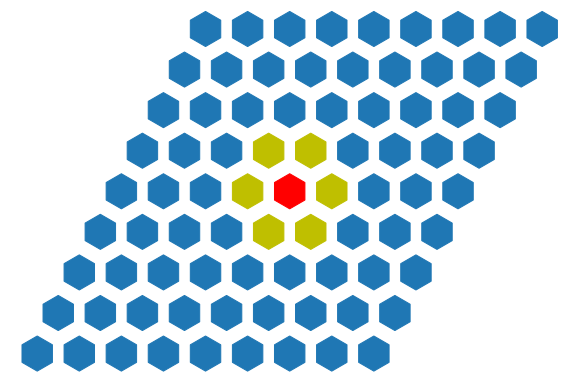

In [235]:
rndm = np.random.RandomState(123)
game = GameField(L=9, b=1.74)
game.field = np.zeros((9, 9), dtype=int)
game.field[4, 4] = 1

draw_field5(game=game)

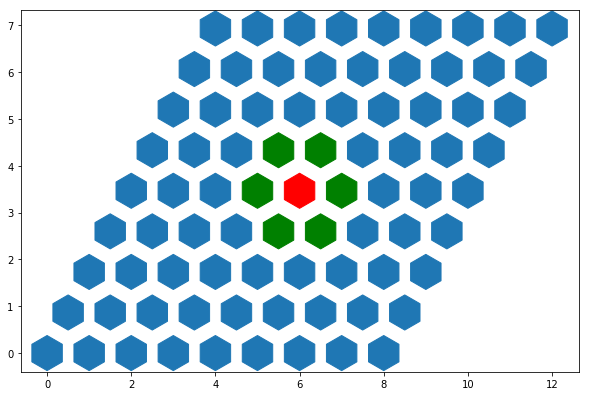

In [179]:
draw_field5(game=game)

In [162]:
game.evolveT(1)

In [163]:
game.field

array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [175]:
7/4

1.75

# Typical snapshots

In [213]:
L=15
fraction_D = 0.1

n_therm = 5000

### $5/3 < b < 7/4$ : 

Random patterns with small flip-flops, which are periodic (below, period=4)

In [237]:
game = GameField(L, b=7/3-0.01)

rndm = np.random.RandomState(12345)
game.field = (rndm.uniform(size=(L, L)) < fraction_D).astype(int)
game.evolveT(n_therm)

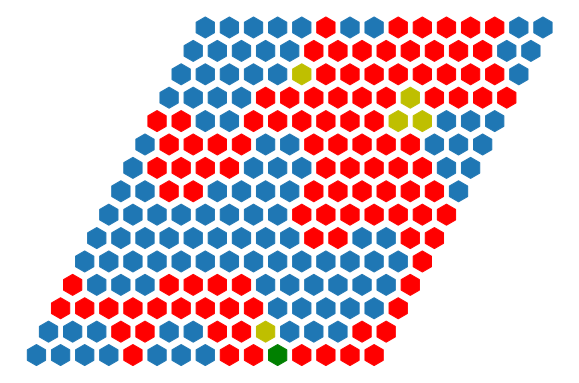

In [238]:
ax = draw_field5(game=game)

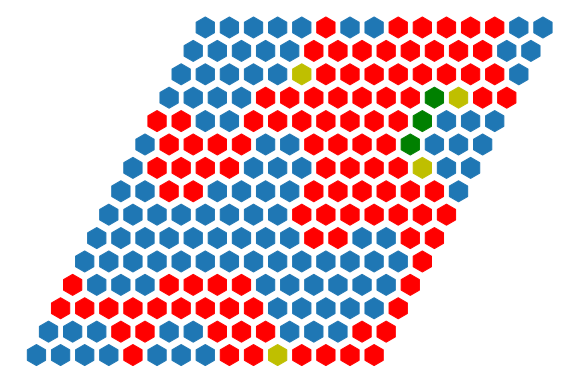

In [248]:
ax = draw_field5(game=game)

### $7/4 < b < 2$:


Nearly static patterns with small isolated islands of defectors. The islands are thin, wire-like, with the thickness between 1 and 3. Again, the patterns are periodic with periods of the order of unity.

In [286]:
game = GameField(L, b=7/4+0.01)

rndm = np.random.RandomState(12345)
game.field = (rndm.uniform(size=(L, L)) < fraction_D).astype(int)
game.evolveT(n_therm)

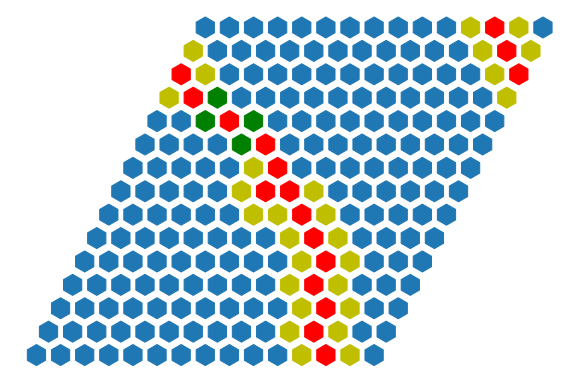

In [287]:
ax = draw_field5(game=game)

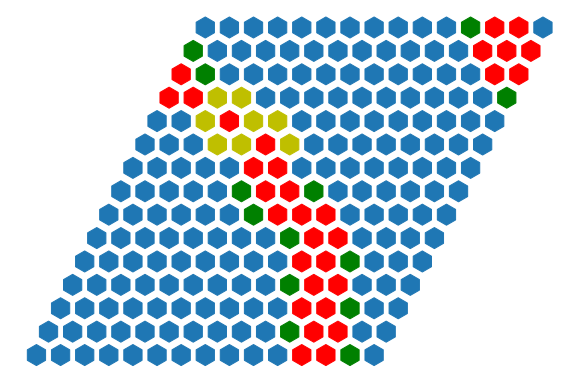

In [288]:
ax = draw_field5(game=game)